NOTE: Run it on Google Colab so that you don't have to worry about imports.

Upload environment.py (the bandit environment made by Manav Mishra).

In [ ]:
from environment import bandit_env
import matplotlib.pyplot as plt
import numpy as np
from fractions import Fraction

# Question 1:

In [ ]:

def argmax(reward):
    max_reward = reward[0]
    ties = [0]

    for idx, i in enumerate(reward[1:]):
        if i > max_reward:
            max_reward = i
            ties = [idx+1]
        if i == max_reward:
            ties.append(idx+1)
    
    if len(ties) > 1:
        index_of_max = np.random.choice(ties)
    else:
        index_of_max = ties[0]
    
    return index_of_max

# create bandit_env
q_mean = [2.5, -3.5, 1.0, 5.0, -2.5] 
q_stddev = [0.33, 1.0, 0.66, 1.98, 1.65] 

arm_bandit_env = bandit_env(q_mean, q_stddev)

print("Number of levers: ",arm_bandit_env.n)
print("Mean of each lever: ",arm_bandit_env.r_mean)
print("Standard Deviation of each lever: ",arm_bandit_env.r_stddev)


Number of levers:  5
Mean of each lever:  [2.5, -3.5, 1.0, 5.0, -2.5]
Standard Deviation of each lever:  [0.33, 1.0, 0.66, 1.98, 1.65]


## Epsilon Greedy

In [ ]:
np.random.seed(10)

# implement e greedy policy
def e_greedy(rewards, e):
    # choose random action with probability e
    if np.random.rand() < e:
        return np.random.randint(0, len(rewards))

    # choose greedy action with probability 1-e
    else:
        return argmax(rewards)

average_rewards1 = np.zeros(6)

cumulative_rewards1 = [[], [], [], [], [], []]

epsilons = [1/128, 1/64, 1/32, 1/16, 1/8, 1/4]
for idx, e in enumerate(epsilons):
    actual_reward = 0
    actions = [0, 0, 0, 0, 0]
    rewards = [0, 0, 0, 0, 0]

    for i in range(1000):
        action = e_greedy(rewards, e)
        reward = arm_bandit_env.pull(action)
        actual_reward += reward
        
        actions[action] += 1

        rewards[action] = rewards[action] + (1/(actions[action])) * (reward - rewards[action])
        cumulative_rewards1[idx].append(actual_reward/(i+1))

    average_rewards1[idx] = actual_reward/1000

print(epsilons)
print(average_rewards1)

[0.0078125, 0.015625, 0.03125, 0.0625, 0.125, 0.25]
[4.5033535  4.69147178 4.72226565 4.80731172 4.56047084 3.80043579]


In [ ]:
print(rewards) #estimated

[2.483230615394033, -3.5891332478440554, 1.0692821953389302, 4.984502591930207, -2.117133889337802]


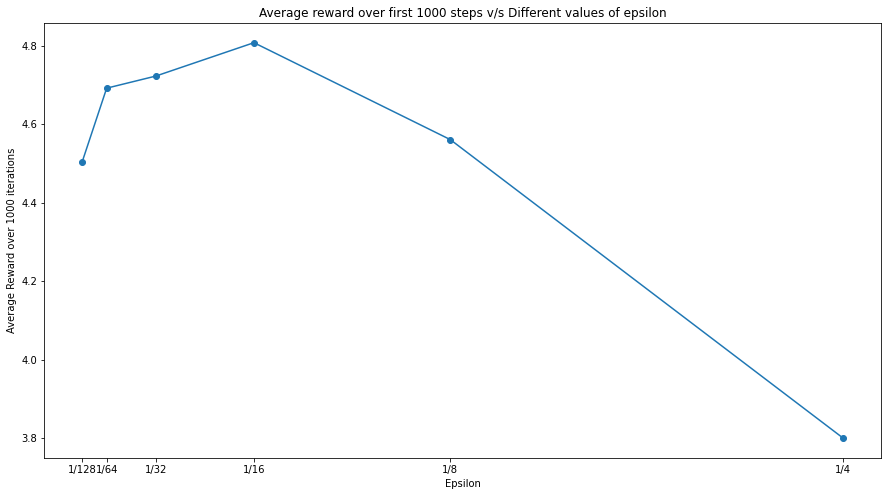

In [ ]:
x_ticks = ['1/128', '1/64','1/32','1/16','1/8','1/4']
plt.figure(figsize = (15,8))
plt.scatter(epsilons ,average_rewards1)
plt.plot(epsilons, average_rewards1)
plt.xticks([float(Fraction(x)) for x in x_ticks],[f'{x}' for x in x_ticks])
plt.xlabel('Epsilon')
plt.ylabel('Average Reward over 1000 iterations')
plt.title('Average reward over first 1000 steps v/s Different values of epsilon')
plt.show()

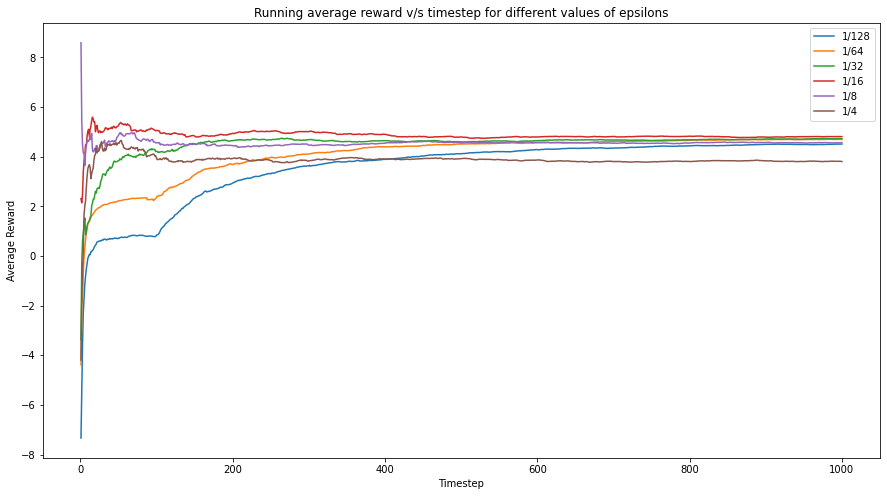

In [ ]:
plt.figure(figsize = (15, 8))

for i in range(len(epsilons)):
    plt.plot(range(1,1001), cumulative_rewards1[i])
plt.legend(['1/128', '1/64','1/32','1/16','1/8','1/4'])
plt.title('Running average reward v/s timestep for different values of epsilons')
plt.xlabel('Timestep')
plt.ylabel('Average Reward')
plt.show()

## Optimistic Greedy

In [ ]:
np.random.seed(10)

average_rewards2 = np.zeros(5)
initial_values = [6,8,10,12,14]
avg = [0]*5
cumulative_rewards2 = [[], [], [], [], []]

for idx, val in enumerate(initial_values):
    actual_reward = 0
    rewards = [val]*5
    for i in range(1000):   

        action = argmax(rewards)
        reward = arm_bandit_env.pull(action)
        actual_reward += reward

        rewards[action] = rewards[action] + (0.1) * (reward - rewards[action])
        cumulative_rewards2[idx].append(actual_reward/(i+1))

    average_rewards2[idx] = actual_reward/1000

print(average_rewards2)

[4.81723207 4.88547576 4.70176967 4.72952792 4.77592055]


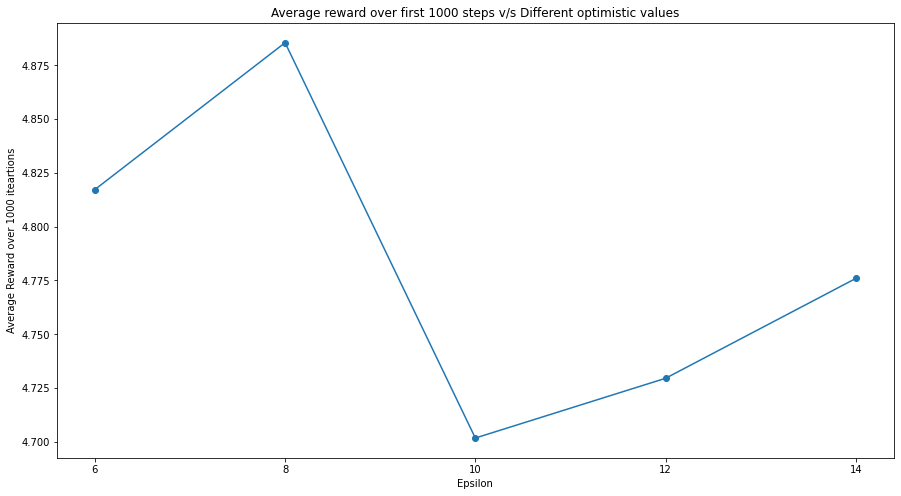

In [ ]:
plt.figure(figsize = (15,8))
plt.scatter(initial_values, average_rewards2)
plt.plot(initial_values, average_rewards2)
plt.xlabel('Epsilon')
plt.ylabel('Average Reward over 1000 iteartions')
plt.title('Average reward over first 1000 steps v/s Different optimistic values')
plt.xticks(initial_values)
plt.show()


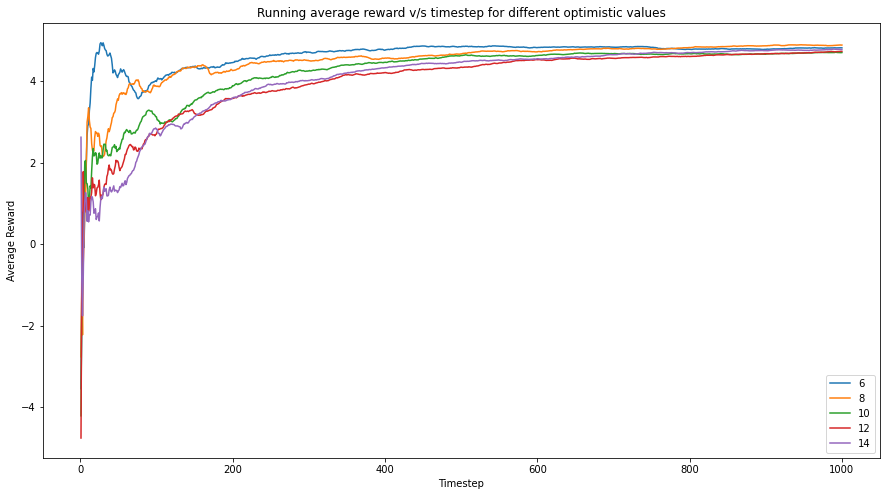

In [ ]:
plt.figure(figsize = (15,8))
for i in range(5):
    plt.plot(range(1,1001), cumulative_rewards2[i])
plt.legend(initial_values)
plt.title('Running average reward v/s timestep for different optimistic values')
plt.xlabel('Timestep')
plt.ylabel('Average Reward')
plt.show()

## UCB 

In [ ]:
np.random.seed(10)

actions = [0, 0, 0, 0, 0]
average_rewards3 = [0]*6
rewards = [0, 0, 0, 0, 0]

c = [1/16, 1/4, 1/2, 1, 2, 4]

# play each action once
for i in range(5):
    action = i
    reward = arm_bandit_env.pull(action)
    actions[action] += 1
    rewards[action] = rewards[action] + (1/(actions[action])) * (reward - rewards[action])

# print(rewards)
cumulative_rewards3 = [[], [], [], [], [], []]
for idx, val in enumerate(c):
    actual_reward = 0
    for i in range(1,1001):   
        vals = []

        for index in range(len(actions)):
            vals.append(rewards[index] + val*np.sqrt((np.log(i))/(actions[index])))

        action = argmax(vals)
        reward = arm_bandit_env.pull(action)
        actual_reward += reward
        actions[action] += 1
        rewards[action] = rewards[action] + (1/(actions[action])) * (reward - rewards[action])
        cumulative_rewards3[idx].append(actual_reward/(i+1))

    average_rewards3[idx] = actual_reward/1000

print(average_rewards3)

[4.976869767447163, 5.023445110608497, 4.894246442145552, 4.956364967996154, 5.027212810860878, 4.98309757077188]


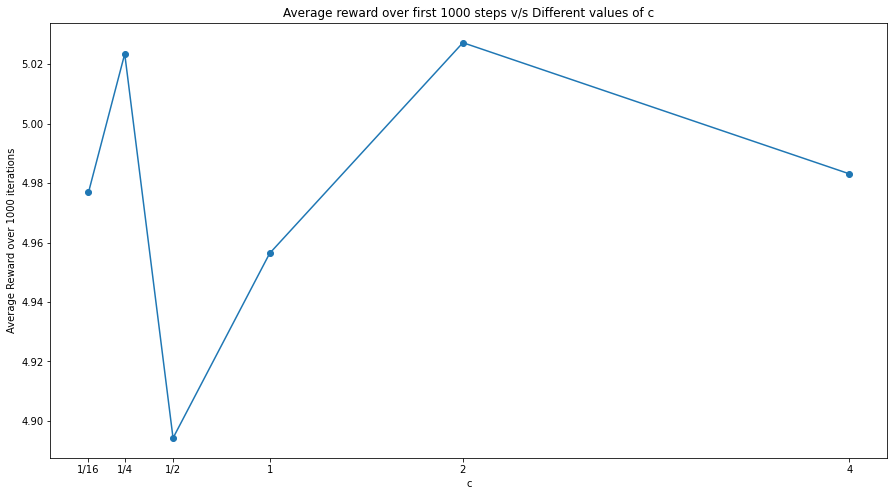

In [ ]:
x_ticks = ['1/16', '1/4', '1/2', '1', '2', '4']
plt.figure(figsize = (15,8))

plt.scatter(c, average_rewards3)
plt.plot(c, average_rewards3)
plt.xticks([float(Fraction(x)) for x in x_ticks],[f'{x}' for x in x_ticks])
plt.xlabel('c')
plt.ylabel('Average Reward over 1000 iterations')
plt.title('Average reward over first 1000 steps v/s Different values of c')
plt.show()


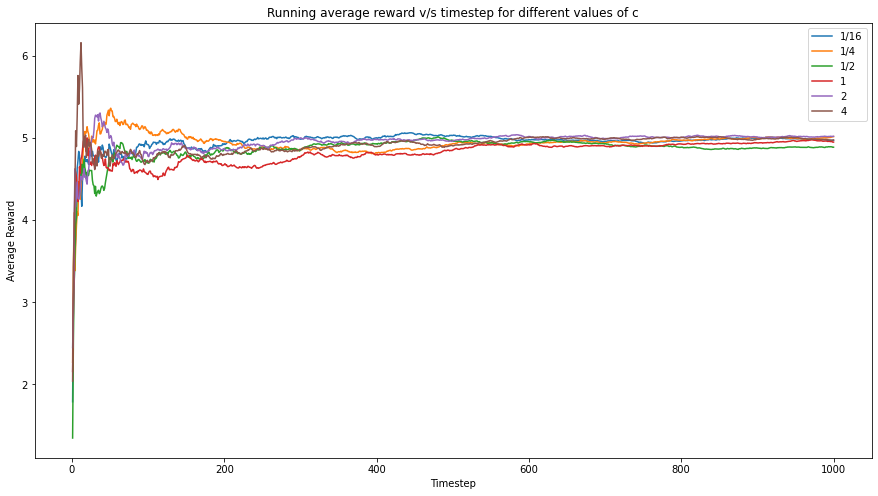

In [ ]:
plt.figure(figsize = (15,8))
for i in range(6):
    plt.plot(range(1,1001), cumulative_rewards3[i])
plt.legend(x_ticks)
plt.title('Running average reward v/s timestep for different values of c')
plt.xlabel('Timestep')
plt.ylabel('Average Reward')
plt.show()

## Gradient Bandit

In [ ]:
np.random.seed(10)

num_bandits = arm_bandit_env.n
alpha_values = [1/32, 1/16, 1/8, 1/4, 1/2, 1, 2]
cumulative_rewards4 = [[], [], [], [], [], [], []]
average_rewards4 = [0]*7
np.random.seed(10)
for idx, alpha in enumerate(alpha_values):
    avg_reward = 0
    actual_reward = 0
    H = np.zeros(num_bandits)
    P = np.ones(num_bandits)/num_bandits # for all a : H_1(a) = 0

    for t in range(1,1001):
        action = np.random.choice(num_bandits, 1, p=P)[0]
        reward = arm_bandit_env.pull(action)

        avg_reward = avg_reward + (1.0 / t) * (reward - avg_reward)
        actual_reward += reward

        # update H
        # selected action
        H[action] = H[action] + alpha * (reward - avg_reward) * (1 - P[action])

        # other actions
        for a in range(num_bandits):
                if a!=action:
                    H[a] = H[a] - alpha * (reward - avg_reward) * P[a]

        # update P
        all_H_exp = np.exp(H)
        P = all_H_exp / np.sum(all_H_exp)

        cumulative_rewards4[idx].append(actual_reward/(t+1))

    average_rewards4[idx] = actual_reward/1000
    # print(action, H, P)


In [ ]:
average_rewards4

[4.779062097795507,
 4.704586859972537,
 4.913826642330134,
 4.925008005440214,
 5.022827500259537,
 5.062802197027071,
 4.972991015408742]

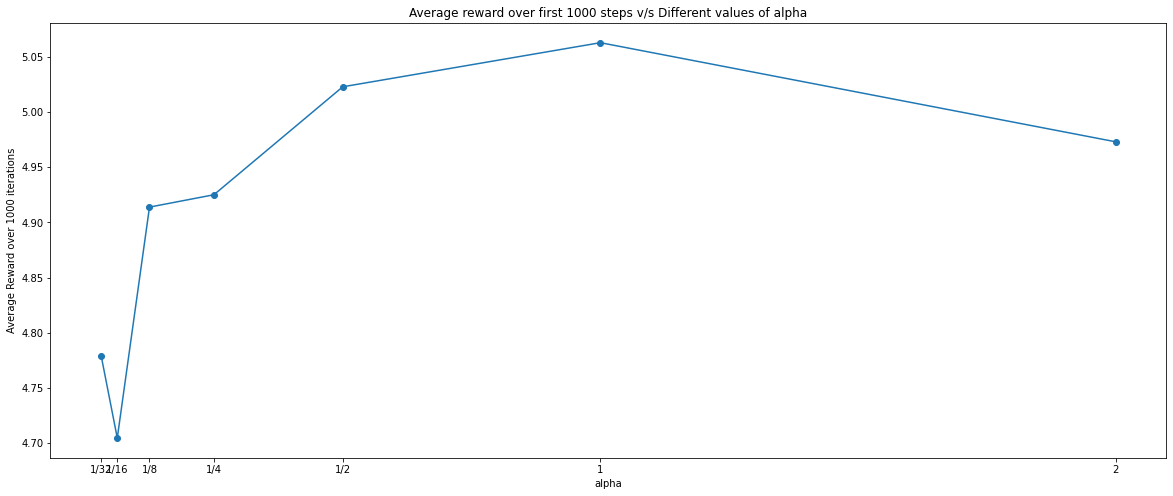

In [ ]:
x_ticks = ['1/32','1/16','1/8','1/4', '1/2', '1', '2']
plt.figure(figsize = (20, 8))
plt.scatter(alpha_values, average_rewards4)
plt.plot(alpha_values, average_rewards4)
plt.xticks([float(Fraction(x)) for x in x_ticks],[f'{x}' for x in x_ticks])
plt.xlabel('alpha')
plt.ylabel('Average Reward over 1000 iterations')
plt.title('Average reward over first 1000 steps v/s Different values of alpha')
plt.show()

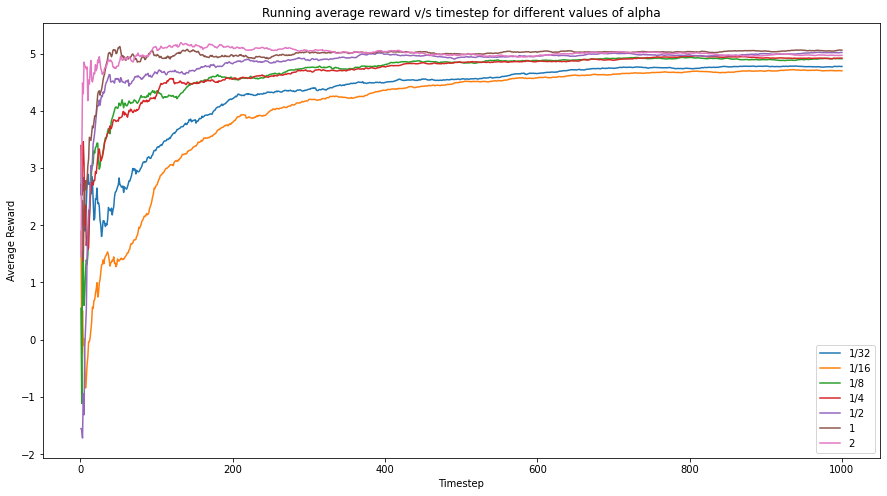

In [ ]:
plt.figure(figsize = (15,8))
for i in range(7):
    plt.plot(range(1,1001), cumulative_rewards4[i])
plt.legend(x_ticks)
plt.title('Running average reward v/s timestep for different values of alpha')
plt.xlabel('Timestep')
plt.ylabel('Average Reward')

plt.show()

## Comparison plot

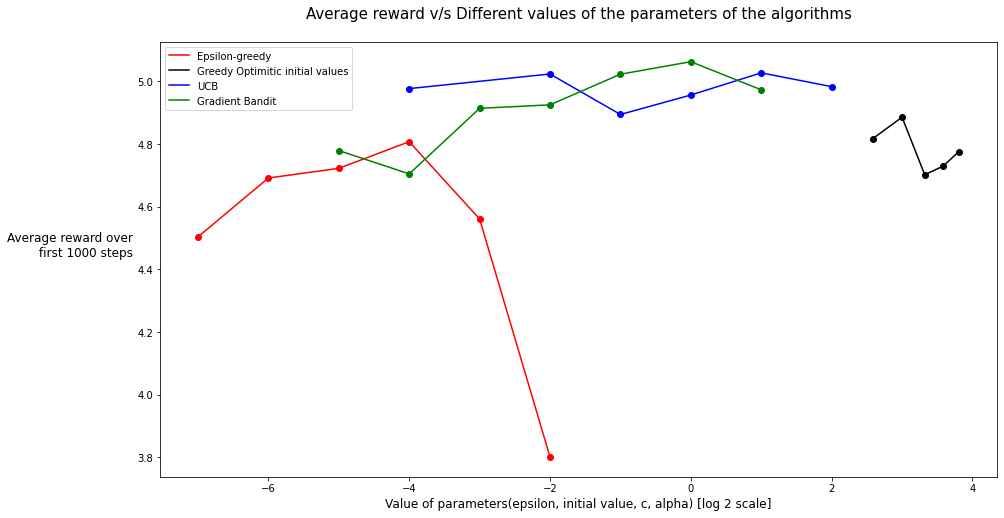

In [ ]:
plt.figure(figsize=(15,8))

plt.scatter(np.log2(epsilons) ,average_rewards1, color = 'red')
plt.plot(np.log2(epsilons), average_rewards1, color = 'red', label = 'Epsilon-greedy')

plt.scatter(np.log2(initial_values) ,average_rewards2, color='black')
plt.plot(np.log2(initial_values), average_rewards2, color='black' , label = 'Greedy Optimitic initial values')

plt.scatter(np.log2(c),average_rewards3, color = 'blue')
plt.plot(np.log2(c), average_rewards3, color = 'blue',label = 'UCB')

plt.scatter(np.log2(alpha_values) ,average_rewards4, color = 'green')
plt.plot(np.log2(alpha_values), average_rewards4,color = 'green',label = 'Gradient Bandit')

plt.title("Average reward v/s Different values of the parameters of the algorithms\n", fontsize = 15)
plt.ylabel("Average reward over\n first 1000 steps", rotation = 0, ha = 'right', fontsize = 12)
plt.xlabel("Value of parameters(epsilon, initial value, c, alpha) [log 2 scale]", fontsize = 12)
plt.legend()
plt.show()

In the x-axis of the plot above -6 implies parameter = 2^(-6) = 1/64 and so on.

# Question 2

## Value Iterations

### Initialization

In [ ]:
states = [0, 1, 2] # Hostel, Canteen, Academic Building
rewards = [-1, +1, +3]
actions = [0, 1] # attend, eat

gamma = 0.9


data = [
        
        # Hostel
        [
         #attend
         [
          [0.5, 0, -1], # probability, next state, reward
          [0.5, 2, +3]
         ],
        
         #eat
         [
          [1, 1, +1]
         ]
        ],
        
        # Canteen
        [
         #attend
         [
          [0.3, 0, -1],
          [0.6, 2, +3],
          [0.1, 1, +1]
         ],
         
         #eat
         [
          [1,1,+1]
         ]
        ],
        
        # Academic Building
        [
         #attend
         [
          [0.3, 1, +1],
          [0.7, 2, +3]
         ],
         #eat
         [
          [0.8, 1, +1],
          [0.2, 2, +3]
         ]
        ]
]



### Implementing the value iteration

In [ ]:
theta = 0.000001

v = [0, 0, 0] # Hostel, Canteen, Academic Building

j = 0
while True:
    j+=1
    delta = 0

    for i in range(len(states)):
        action = [0, 0]

        for a in actions:
            for prob, next_state, reward in data[i][a]:
                action[a] += prob * (reward + gamma * v[next_state])
        
        best_action_value = max(action)

        delta = max(delta, abs(best_action_value - v[i]))
        v[i] = best_action_value

    if delta < theta:
        break
# print(f'Value converged at iteration {j}')
v

[18.951372028251477, 19.807446613546325, 20.940567645865922]

In [ ]:
policy = [1, 1, 1] # initializing with random policy 
for s in range(len(states)):
    action = [0, 0]
    for a in actions:
        for prob, next_state, reward in data[s][a]:
            action[a] += prob * (reward + gamma * v[next_state])

    best_action = argmax(action)
    
    # Always take the best action
    policy[s] = best_action
policy

[0, 0, 0]

Proposed policy is to attend on all states.

## Policy Iteration

### Initialization and defining transition probability function

In [ ]:
#[Hostel, Canteen, Academic Building]
S = [0, 1, 2]
R = [-1, +1, +3]

# [Attend, eat]
A = [0, 1]

# Transition Probabilities 
def P(s_next, s, a):
    if s == 0:
        if a == 0:
            if s_next == 0:
                return 0.5
            elif s_next == 1:
                return 0
            elif s_next == 2:
                return 0.5

        elif a == 1:
            if s_next == 1:
                return 1
            else:
                return 0
    if s == 1:
        if a == 0:
            if s_next == 0:
                return 0.3
            elif s_next == 1:
                return 0.1
            elif s_next == 2:
                return 0.6

        elif a == 1:
            if s_next == 1:
                return 1
            else:
                return 0
    if s == 2:
        if a == 0:
            if s_next == 0:
                return 0
            elif s_next == 1:
                return 0.3
            elif s_next == 2:
                return 0.7

        elif a == 1:
            if s_next == 0:
                return 0
            elif s_next == 1:
                return 0.8
            elif s_next == 2:
                return 0.2

### Policy evaluation and improvement functions

In [ ]:
def policy_evaluation(policy, S, R):
    v = {s:0 for s in S}

    while True:
        oldv = v.copy()

        for s in S:

            a = policy[s]
            v[s] = R[s] + sum(P(s_next, s, a)*oldv[s_next] for s_next in S)

        if all(oldv[s] == v[s] for s in S):
            break

        return v 

def policy_improvement(v, S, A, R):
    policy = {s:1 for s in S}

    for s in S:
        Q = {}

        for a in A:
            Q[a] = R[s] + sum(P(s_next, s, a)*v[s_next] for s_next in S)
        
        policy[s] = max(Q, key = Q.get)

    return policy

### Implementing the policy Iteration

In [ ]:
def policy_iteration(S, A, P, R):
    policy = {s: 1 for s in S} # Initial policy is eat in all states

    while True:
        old_policy = policy.copy()

        v = policy_evaluation(policy, S, R)

        policy = policy_improvement(v, S, A, R)

        if all(old_policy[s] == policy[s] for s in S):
            break
    # policy converged
    return policy

In [ ]:
optimal_policy = policy_iteration(S, A, P, R)

In [ ]:
optimal_policy

{0: 0, 1: 0, 2: 0}

The optimal policy is to attend in all states.

In [ ]:
v

[18.951372028251477, 19.807446613546325, 20.940567645865922]

## Discussion of my results of value and policy iterations:

**Some theory:**

In *Policy Iteration*, at each step, policy evaluation is run until convergence, then the policy is updated and the process repeats. 

In *Value Iteration* only does a single iteration of policy evaluation at each step. Next, for each state, it takes the maximum action value to be the estimated state value.

**Observations:**

1.   Value iteration and policy iteration, both, have converged to the same estimates of the reward from each state( hostel, canteen, academic building). 
2.   Both, value iteration and policy iteration gave the optimal policy of choosing 'attend' on all states.   
3.   The implementation of the policy iteration method requires lesser iterations to converge than the value iteration method.
4.   As can be seen from the cells below:
***Value iteration*** took --> ***613 microseconds*** ( ran 1000 times ), and 

***Policy iteration*** took --> ***45 microseconds*** ( ran 10000 times )

It is clear that policy iteration is much faster than value iteration, which makes sense as value iterations requires a lot more computations to converge.



In [ ]:
# Value iteration

%%timeit
states = [0, 1, 2] # Hostel, Canteen, Academic Building
rewards = [-1, +1, +3]
actions = [0, 1] # attend, eat

gamma = 0.9


data = [
        
        # Hostel
        [
         #attend
         [
          [0.5, 0, -1], # probability, next state, reward
          [0.5, 2, +3]
         ],
        
         #eat
         [
          [1, 1, +1]
         ]
        ],
        
        # Canteen
        [
         #attend
         [
          [0.3, 0, -1],
          [0.6, 2, +3],
          [0.1, 1, +1]
         ],
         
         #eat
         [
          [1,1,+1]
         ]
        ],
        
        # Academic Building
        [
         #attend
         [
          [0.3, 1, +1],
          [0.7, 2, +3]
         ],
         #eat
         [
          [0.8, 1, +1],
          [0.2, 2, +3]
         ]
        ]
]

theta = 0.000001

v = [0, 0, 0] # Hostel, Canteen, Academic Building

j = 0
while True:
    j+=1
    delta = 0

    for i in range(len(states)):
        action = [0, 0]

        for a in actions:
            for prob, next_state, reward in data[i][a]:
                action[a] += prob * (reward + gamma * v[next_state])
        
        best_action_value = max(action)

        delta = max(delta, abs(best_action_value - v[i]))
        v[i] = best_action_value

    if delta < theta:
        break
# print(f'Value converged at iteration {j}')
# v

1000 loops, best of 5: 613 µs per loop


In [ ]:
# Policy Iteration

%%timeit
#[Hostel, Canteen, Academic Building]
S = [0, 1, 2]
R = [-1, +1, +3]

# [Attend, eat]
A = [0, 1]

# Transition Probabilities 
def P(s_next, s, a):
    if s == 0:
        if a == 0:
            if s_next == 0:
                return 0.5
            elif s_next == 1:
                return 0
            elif s_next == 2:
                return 0.5

        elif a == 1:
            if s_next == 1:
                return 1
            else:
                return 0
    if s == 1:
        if a == 0:
            if s_next == 0:
                return 0.3
            elif s_next == 1:
                return 0.1
            elif s_next == 2:
                return 0.6

        elif a == 1:
            if s_next == 1:
                return 1
            else:
                return 0
    if s == 2:
        if a == 0:
            if s_next == 0:
                return 0
            elif s_next == 1:
                return 0.3
            elif s_next == 2:
                return 0.7

        elif a == 1:
            if s_next == 0:
                return 0
            elif s_next == 1:
                return 0.8
            elif s_next == 2:
                return 0.2

def policy_evaluation(policy, S, R):
    v = {s:0 for s in S}

    while True:
        oldv = v.copy()

        for s in S:

            a = policy[s]
            v[s] = R[s] + sum(P(s_next, s, a)*oldv[s_next] for s_next in S)

        if all(oldv[s] == v[s] for s in S):
            break

        return v 

def policy_improvement(v, S, A, R):
    policy = {s:1 for s in S}

    for s in S:
        Q = {}

        for a in A:
            Q[a] = R[s] + sum(P(s_next, s, a)*v[s_next] for s_next in S)
        
        policy[s] = max(Q, key = Q.get)

    return policy

def policy_iteration(S, A, P, R):
    policy = {s: 1 for s in S} # Initial policy is eat in all states

    while True:
        old_policy = policy.copy()

        v = policy_evaluation(policy, S, R)

        policy = policy_improvement(v, S, A, R)

        if all(old_policy[s] == policy[s] for s in S):
            break
    # policy converged
    return policy

policy_iteration(S, A, P, R)

10000 loops, best of 5: 44.7 µs per loop
